In [1]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
import os
import matplotlib.pyplot as plt
import copy # needed for deepcopy of dictionaries
from matplotlib.lines import Line2D # for custom legend
from matplotlib_scalebar.scalebar import ScaleBar
from datetime import datetime # to print timing of cells

plt.rcParams['svg.fonttype'] = 'none'

from skimage.filters import threshold_otsu # threshold method used to threshold inj site


# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2
# Set-up variables


In [2]:

home_dir = "/Volumes/Data/"
# home_dir = "/mnt/labNAS/"

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
# out_path = "/Users/eisko/Documents/CSHL/mapseq_paper/svg_images/"
# out_path = home_dir+"/Emily/STP_for_MAPseq/4_python_output/output_figs/"
out_path = "/Users/eisko/Documents/CSHL/Yr4/Manuscript STP_mapseq paper/figures/supp_STP/"


# load metadata
metadata = pd.read_csv("stp_metadata.csv")



In [3]:
start = datetime.now()
# import masks for each brain in order of metadata
# create list of dictionaries containing masks
areas = ["grey", "CTX", "STR", "CP","BS"]

all_masks = []

for i in range(metadata.shape[0]):
    brain = metadata.loc[i, "brain"]
    print("\n","working on", brain)
    masks_folder = in_path+"masks/"+brain+"_masks/"

    masks = {}
    for area in areas:
        print("working on", area)
        with open(masks_folder+brain+"_"+area+".npy", "rb") as f:
            masks[area] = np.load(f)

    all_masks.append(masks)

print(datetime.now()-start)

len(all_masks)


 working on ACC_MMus_230403_b1
working on grey
working on CTX
working on STR
working on CP
working on BS

 working on ACC_MMus_230404_b2
working on grey
working on CTX
working on STR
working on CP
working on BS

 working on ACC_MMus_230427_b3
working on grey
working on CTX
working on STR
working on CP
working on BS

 working on ACC_STeg_230308_b1
working on grey
working on CTX
working on STR
working on CP
working on BS

 working on ACC_STeg_230322_b2
working on grey
working on CTX
working on STR
working on CP
working on BS

 working on ACC_STeg_230501_b3
working on grey
working on CTX
working on STR
working on CP
working on BS

 working on OMC_MMus_220119_b0
working on grey
working on CTX
working on STR
working on CP
working on BS

 working on OMC_MMus_220303_b1
working on grey
working on CTX
working on STR
working on CP
working on BS

 working on OMC_MMus_220324_b2
working on grey
working on CTX
working on STR
working on CP
working on BS

 working on OMC_STeg_220208_b0
working on gre

12

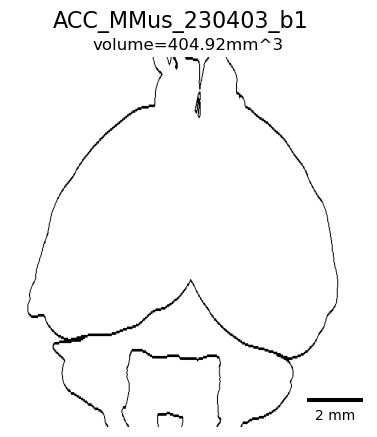

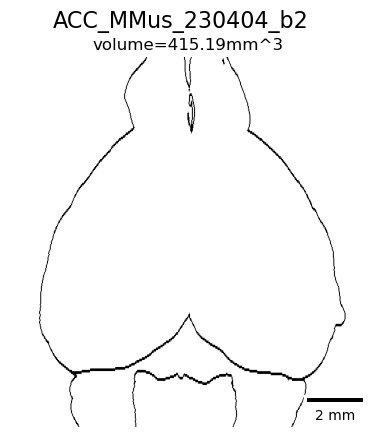

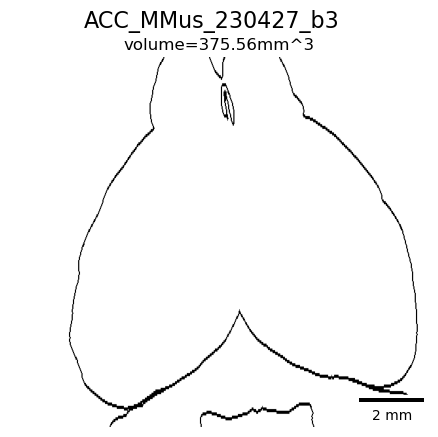

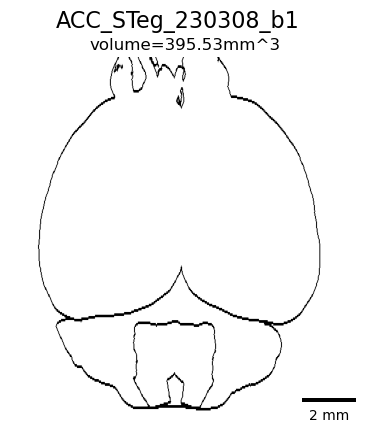

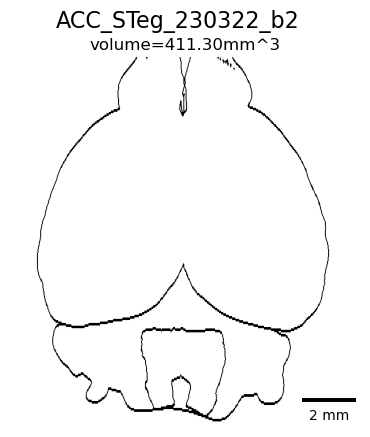

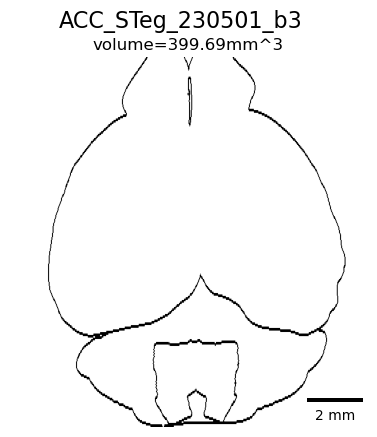

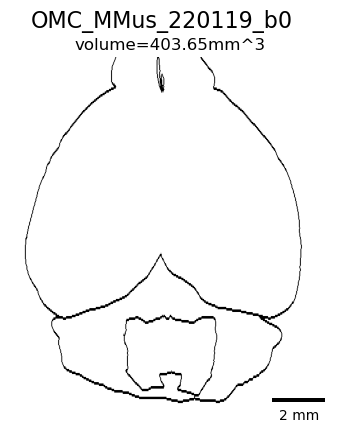

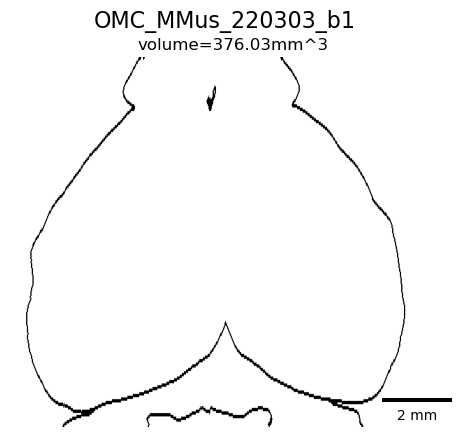

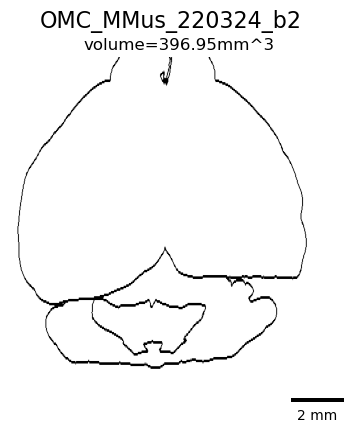

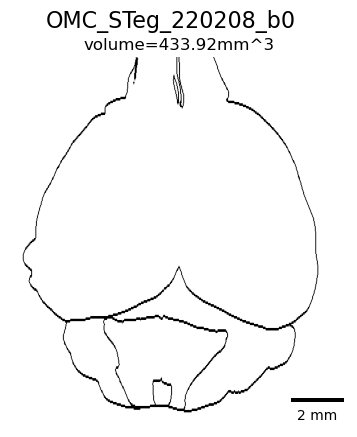

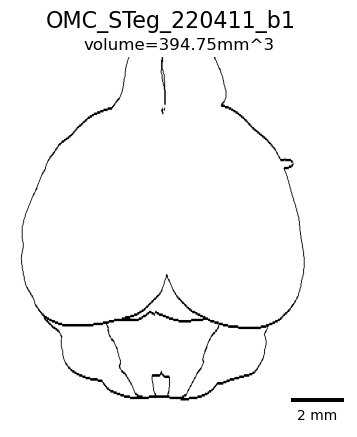

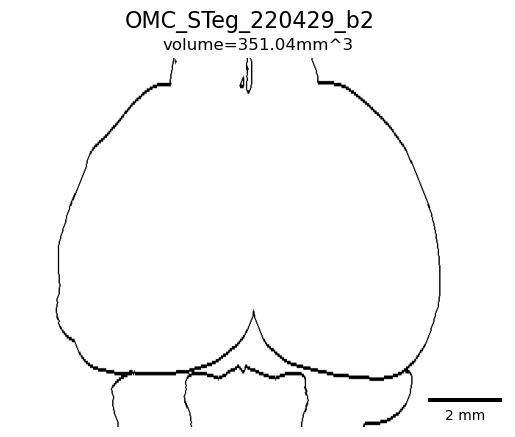

In [18]:
mask_order = ["grey", "BS", "STR", "CP", "CTX"]
voxel_size = 0.05*0.02*0.02

# create outlines of each brain
for i in range(metadata.shape[0]):
    brain = metadata.loc[i,'brain']
    mask = all_masks[i]
    grey_sum = mask['grey'].sum()
    volume = grey_sum*voxel_size

    plot_contour(images=None, mask_dict=mask, masks_to_plot=mask_order, view="top")
    plt.suptitle(metadata.loc[i,"brain"], size=16)
    plt.title("volume="+str(volume)[:6]+"mm^3")
    
    # add scalebar
    scalebar = ScaleBar(20, "um", location="lower right")
    ax = plt.gca()
    ax.add_artist(scalebar)

    plt.savefig(out_path+brain+"_outline.svg", dpi=300, bbox_inches="tight")

    plt.show()

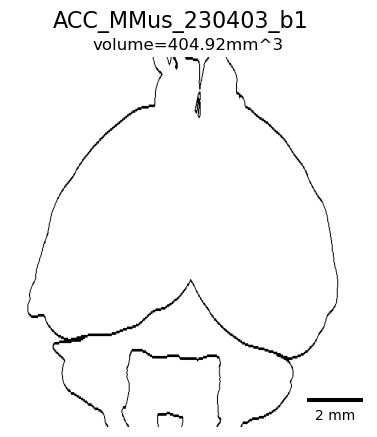

In [16]:
mask_order = ["grey", "BS", "STR", "CP", "CTX"]
voxel_size = 0.05*0.02*0.02

# create outlines of each brain
i=0
metadata.loc[i,'brain']
mask = all_masks[i]
grey_sum = mask['grey'].sum()
volume = grey_sum*voxel_size

plot_contour(images=None, mask_dict=mask, masks_to_plot=mask_order, view="top")
plt.suptitle(metadata.loc[i,"brain"], size=16)
plt.title("volume="+str(volume)[:6]+"mm^3")

# add scalebar
scalebar = ScaleBar(20, "um", location="lower right")
ax = plt.gca()
ax.add_artist(scalebar)


# plt.savefig(out_path+brain+"_outline.jpg", dpi=300, bbox_inches="tight")

plt.show()

In [17]:
for i in range(metadata.shape[0]):
    print(all_masks[i]['grey'].shape)

(265, 499, 640)
(265, 499, 640)
(226, 499, 640)
(270, 499, 640)
(270, 499, 640)
(265, 499, 640)
(280, 464, 605)
(212, 499, 640)
(280, 499, 640)
(280, 499, 640)
(280, 499, 640)
(201, 499, 675)


/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


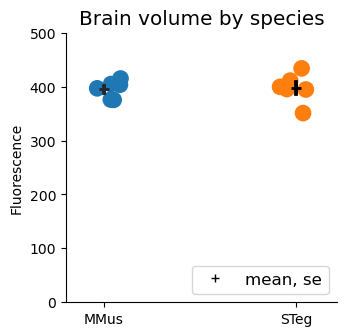

In [19]:
mask_order = ["grey", "BS", "STR", "CP", "CTX"]
voxel_size = 0.05*0.02*0.02

# create outlines of each brain
for i in range(metadata.shape[0]):
    metadata.loc[i,'brain']
    mask = all_masks[i]
    grey_sum = mask['grey'].sum()
    volume = grey_sum*voxel_size
    metadata.loc[i,'volume'] = volume

dot_plot_by_species(metadata, to_plot="volume")
plt.ylim(0,500)
plt.title("Brain volume by species")
plt.savefig(out_path+"volume_compare.svg", dpi=300, bbox_inches="tight")
plt.show()